In [1]:
addpath('~/git/sfs');
SFS_start;

[Warning: Function isrow has the same name as a MATLAB builtin. We suggest you
rename the function to avoid a potential name conflict.] 
[> In path (line 109)
  In addpath (line 86)
  In SFS_start (line 59)
  In pymat_eval (line 31)
  In matlabserver (line 24)]

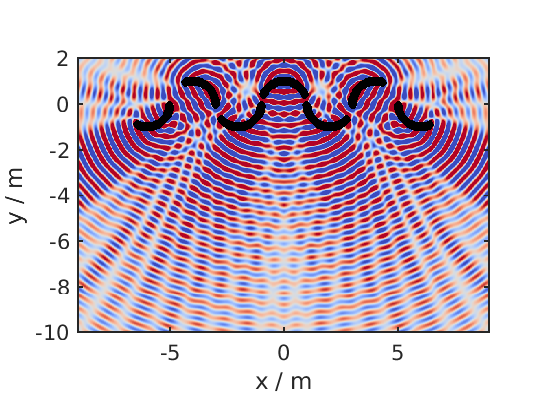

In [3]:
clear all;

%% ===== Configuration ===================================================
conf = SFS_config_example;
conf.resolution = 600; % / samples
conf.xref = [0 -3 0]; % / m
conf.usetapwin = false;
conf.plot.normalisation = 'center';


%% ===== Secondary Sources ===============================================
% Create an array with convex and concave elements
% get smal circular arrays
conf.secondary_sources.size = 2; % / m
conf.secondary_sources.geometry = 'circle';
conf.secondary_sources.number = 100;
% get secondary sources and store them, to do this calculation only once
x0 = secondary_source_positions(conf);
% first half
h1 = x0(1:51,:);
% second half
h2 = x0(52:100,:);
h2(:,5) = -1*h2(:,5); % change direction of sources
% create new array
x00 = h1;                                    % center
x01 = bsxfun(@plus,h2,[2 0 0 0 0 0 0]);      % first right
x_01 = bsxfun(@plus,h2,[-2 0 0 0 0 0 0]);    % first left
x02 = bsxfun(@plus,h1,[4 0 0 0 0 0 0]);      % second right
x_02 = bsxfun(@plus,h1,[-4 0 0 0 0 0 0]);    % second left
x03 = bsxfun(@plus,h2,[6 0 0 0 0 0 0]);      % third right
x_03 = bsxfun(@plus,h2,[-6 0 0 0 0 0 0]);    % third left
x0 = [x_03; x_02; x_01; x00; x01; x02; x03]; % put all together
conf.secondary_sources.x0 = x0;              % store it
conf.secondary_sources.geometry = 'custom';

%% ===== Wave Field Synthesis ============================================
sound_field_mono_wfs([-9 9],[-10 2],0,[0 2.5 0],'ps',700,conf)